In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession
import pickle
from scipy import stats
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
import os
from allensdk.brain_observatory.ecephys.stimulus_analysis import NaturalMovies 
from allensdk.brain_observatory.behavior.behavior_project_cache import BehaviorProjectCache 

In [2]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
manifest_path = os.path.join("example_ecephys_project_cache", "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
nwb_path = 'D:\\allan data\\ecephys_session_750749662.nwb'
session = EcephysSession.from_nwb_path(nwb_path, api_kwargs={
        "amplitude_cutoff_maximum": np.inf,
        "presence_ratio_minimum": -np.inf,
        "isi_violations_maximum": np.inf
    })
session.units.head()


,waveform_PT_ratio,isolation_distance,presence_ratio,cumulative_drift,nn_miss_rate,silhouette_score,nn_hit_rate,d_prime,L_ratio,waveform_halfwidth,...,probe_vertical_position,probe_id,probe_horizontal_position,channel_local_index,ecephys_structure_acronym,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951851033,0.800280,64.278805,0.99,1008.85,0.001013,0.266277,0.976000,4.869820,0.000565,0.178559,...,20,769322802,11,1,Eth,probeA,,29999.966623,1249.998609,True
951851022,0.768053,31.700156,0.99,649.59,0.002382,0.051163,0.913508,4.020373,0.009740,0.137353,...,20,769322802,11,1,Eth,probeA,,29999.966623,1249.998609,True
951851012,0.585977,79.491003,0.99,685.95,0.002753,NaN,0.977333,5.343126,0.002243,0.206030,...,20,769322802,11,1,Eth,probeA,,29999.966623,1249.998609,True
951851052,0.562802,69.462814,0.99,390.69,0.001215,0.218381,0.981333,5.602064,0.002254,0.151089,...,60,769322802,11,5,Eth,probeA,,29999.966623,1249.998609,True
951851085,0.698896,74.132739,0.99,361.10,0.002548,0.043217,0.934000,4.593687,0.005946,0.123618,...,80,769322802,27,7,PO,probeA,,29999.966623,1249.998609,True


In [159]:
pupil_data=session.get_pupil_data(suppress_pupil_data=False)
pupil_data.head()

,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,...,raw_screen_coordinates_x_cm,raw_screen_coordinates_y_cm,raw_screen_coordinates_spherical_x_deg,raw_screen_coordinates_spherical_y_deg,filtered_eye_area,filtered_pupil_area,filtered_screen_coordinates_x_cm,filtered_screen_coordinates_y_cm,filtered_screen_coordinates_spherical_x_deg,filtered_screen_coordinates_spherical_y_deg
3.14509,313.072933,232.635845,5.086371,5.844809,-0.464346,317.928545,193.914539,39.117682,41.309906,0.162665,...,38.027559,13.938417,14.168695,5.309430,18419.321997,1340.288480,38.027559,13.938417,14.168695,5.309430
3.16893,313.644148,232.714296,4.822570,6.142655,-0.350147,318.001720,194.122879,39.158337,41.412689,0.152127,...,37.932548,14.414922,14.130677,5.489849,18484.864737,1346.966335,37.932548,14.414922,14.130677,5.489849
3.17042,313.948385,232.825180,4.815014,6.083806,-0.259151,318.076198,194.155259,39.219819,41.219123,0.187748,...,38.026302,14.631593,14.162315,5.571852,18449.836282,1334.404157,38.026302,14.631593,14.162315,5.571852
3.20369,313.887773,232.993060,4.932537,6.033723,-0.211896,318.189399,194.177436,38.958309,41.225940,0.361098,...,38.159125,14.462819,14.211256,5.507978,18362.144834,1334.845564,38.159125,14.462819,14.211256,5.507978
3.25324,313.702244,233.023684,4.858374,6.055974,-0.265270,317.964471,194.709674,39.030627,41.154388,0.321645,...,37.663793,14.512168,14.033695,5.526656,18483.481230,1330.216018,37.663793,14.512168,14.033695,5.526656


In [171]:
start_time=presentations.start_time.to_list()
stop_time=presentations.stop_time.to_list()
num=len(start_time)
# for i in range(num):
i=0
pupil_data_in_range=pupil_data.loc[pupil_data.index.to_series().between(start_time[i],stop_time[i])]
x=pupil_data_in_range['filtered_screen_coordinates_x_cm']
y=pupil_data_in_range['filtered_screen_coordinates_y_cm']

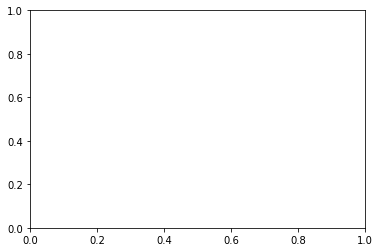

In [188]:
fig,ax=plt.subplots()


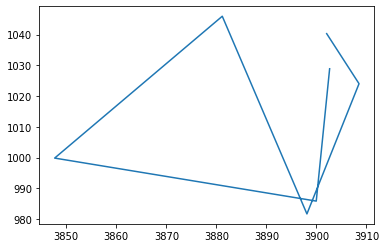

In [195]:
plt.plot(x*100,y*100)


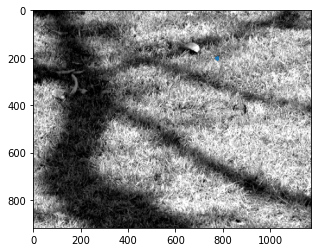

In [200]:
# fig,ax=plt.subplots(figsize=(10,10))
plt.imshow(cache.get_natural_scene_template(117), cmap=plt.cm.gray)
plt.plot(x*20,y*20)
plt.show()

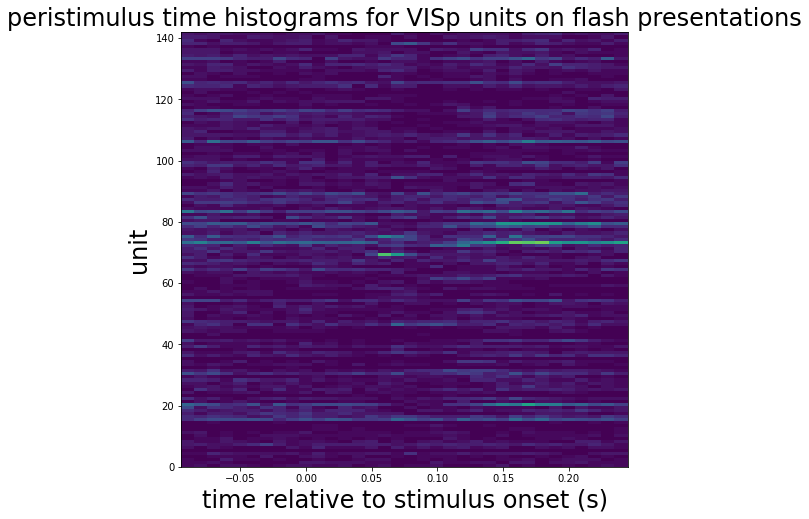

In [125]:
i=1
presentations = session.get_stimulus_table("natural_scenes")
presentations=presentations[presentations['frame']==i]
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.25 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()


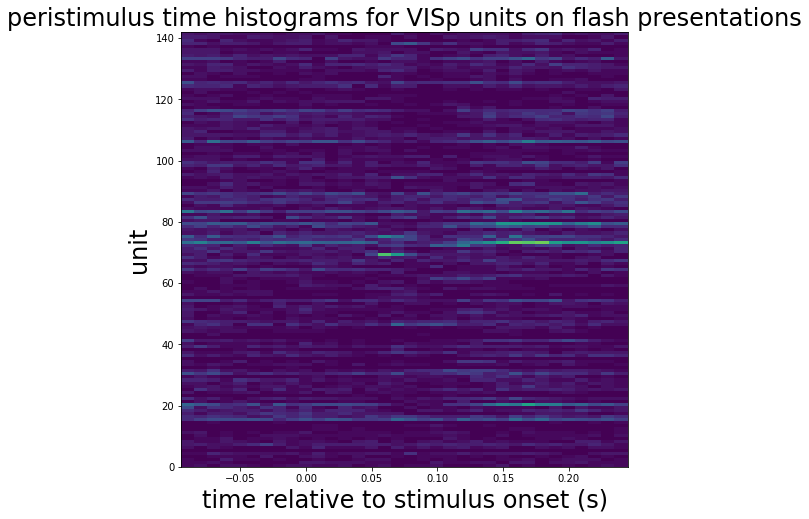

In [84]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

In [38]:
scene_presentations = session.get_stimulus_table("natural_scenes")
scene_presentations.head()

,frame,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,
51355,60,5909.199079,9,natural_scenes,5909.449290,0.250211,4908
51356,55,5909.449290,9,natural_scenes,5909.699500,0.250211,4909
51357,91,5909.699500,9,natural_scenes,5909.949711,0.250211,4910
51358,58,5909.949711,9,natural_scenes,5910.199922,0.250211,4911
51359,62,5910.199922,9,natural_scenes,5910.450124,0.250202,4912


In [17]:
scene_presentations.sort_values(by='frame')

,frame,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,
67331,-1,8344.233702,13,natural_scenes,8344.483911,0.250209,4994
51929,-1,6052.819120,9,natural_scenes,6053.069325,0.250204,4994
67052,-1,8274.425391,13,natural_scenes,8274.675600,0.250209,4994
52978,-1,6315.288505,9,natural_scenes,6315.538719,0.250214,4994
52571,-1,6213.453389,9,natural_scenes,6213.703597,0.250208,4994
...,...,...,...,...,...,...,...
54784,117,7067.166772,10,natural_scenes,7067.416976,0.250204,5025
54997,117,7120.461292,10,natural_scenes,7120.711505,0.250213,5025
52170,117,6113.119527,9,natural_scenes,6113.369739,0.250212,5025


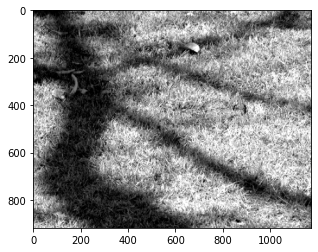

In [46]:
plt.imshow(cache.get_natural_scene_template(117), cmap=plt.cm.gray)

In [98]:
pupil_data.head()

,corneal_reflection_center_x,corneal_reflection_center_y,corneal_reflection_height,corneal_reflection_width,corneal_reflection_phi,pupil_center_x,pupil_center_y,pupil_height,pupil_width,pupil_phi,eye_center_x,eye_center_y,eye_height,eye_width,eye_phi
3.14509,313.072933,232.635845,5.086371,5.844809,-0.464346,317.928545,193.914539,39.117682,41.309906,0.162665,299.837742,210.806448,120.295762,153.141141,0.006772
3.16893,313.644148,232.714296,4.822570,6.142655,-0.350147,318.001720,194.122879,39.158337,41.412689,0.152127,299.473196,211.051983,120.098835,153.413366,0.005823
3.17042,313.948385,232.825180,4.815014,6.083806,-0.259151,318.076198,194.155259,39.219819,41.219123,0.187748,299.538486,211.138344,120.146656,153.267939,0.005866
3.20369,313.887773,232.993060,4.932537,6.033723,-0.211896,318.189399,194.177436,38.958309,41.225940,0.361098,299.659258,211.122580,120.083569,152.903267,0.004894
3.25324,313.702244,233.023684,4.858374,6.055974,-0.265270,317.964471,194.709674,39.030627,41.154388,0.321645,299.663798,211.213608,119.971766,153.407624,0.002711


In [123]:
index=pupil_data.index.to_series()
interval=index-index.shift()
interval.describe()

count    294838.000000
mean          0.033349
std           0.003197
min           0.001260
25%           0.033190
50%           0.033330
75%           0.033460
max           0.218550
dtype: float64

In [62]:
targets.values

array([1.0, 0.0, 0.0, '[0.0, 0.0]', '[1920.0, 1080.0]', 2846.623388924872,
       4.0, 'natural_movie_one', 2846.6567503604865, 0.03336143561455174,
       3887], dtype=object)

In [55]:
targets_arr = targets.values.astype(int)
labels = np.unique(targets_arr)

ValueError: invalid literal for int() with base 10: '[0.0, 0.0]'

In [49]:
scene_presentations = session.get_stimulus_table("natural_scenes")
targets_arr = targets.values.astype(int)
labels = np.unique(targets_arr)

NameError: name 'design' is not defined

In [69]:
cache.NATURAL_MOVIE_KEY

'natural_movie'

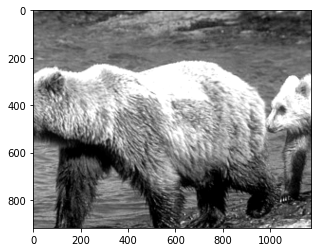

In [95]:
plt.imshow(cache.get_natural_scene_template(0), cmap=plt.cm.gray)

In [13]:
scene_presentations = session.get_stimulus_table("natural_scenes")


In [14]:
scene_presentations.head()

,frame,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,
51355,60,5909.199079,9,natural_scenes,5909.449290,0.250211,4908
51356,55,5909.449290,9,natural_scenes,5909.699500,0.250211,4909
51357,91,5909.699500,9,natural_scenes,5909.949711,0.250211,4910
51358,58,5909.949711,9,natural_scenes,5910.199922,0.250211,4911
51359,62,5910.199922,9,natural_scenes,5910.450124,0.250202,4912
